In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale

from matplotlib import pyplot as plt
%matplotlib inline

## 1. Data

In [2]:
df = pd.read_csv("Hitters.csv")

In [3]:
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [7]:
#select only numerical values
df = df.select_dtypes(['number'])
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5


In [9]:
#drop na values
df = df.dropna()
df.isna().sum()

AtBat      0
Hits       0
HmRun      0
Runs       0
RBI        0
Walks      0
Years      0
CAtBat     0
CHits      0
CHmRun     0
CRuns      0
CRBI       0
CWalks     0
PutOuts    0
Assists    0
Errors     0
Salary     0
dtype: int64

In [12]:
y = df['Salary']
X = df.drop('Salary', axis = 1)

In [13]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25


In [14]:
y.head()

1    475.0
2    480.0
3    500.0
4     91.5
5    750.0
Name: Salary, dtype: float64

In [17]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.3)

## 1.1 Lasso Regression

In [18]:
#set alphas
alphas = 10**np.linspace(10,-2,100)*0.5

In [20]:
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []
for alpha in alphas:
    lasso.set_params(alpha = alpha)
    lasso_model = lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)   

Text(0.5, 1.0, 'Lasso')

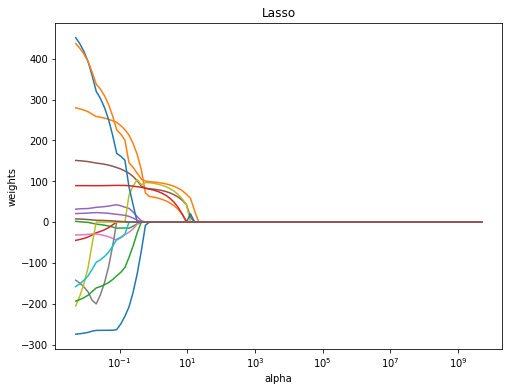

In [36]:
plt.figure(figsize=(8,6))
fig = plt.gca()
fig.plot(alphas, coefs)
fig.set_xscale('log')

plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso')

In [37]:
#We see alpha is around 10^1, thus we check which features are still there when alpha is around 10.
lasso2 = Lasso(alpha = 10, max_iter = 10000, normalize = True).fit(X_train,y_train)
pd.Series(lasso2.coef_, index=X_train.columns)

AtBat      0.000000
Hits       0.000000
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      1.693983
Years      0.000000
CAtBat     0.000000
CHits      0.056380
CHmRun     0.000000
CRuns      0.000000
CRBI       0.191238
CWalks     0.000000
PutOuts    0.000000
Assists    0.000000
Errors     0.000000
dtype: float64

The final three predictors that remain in the model are 'Walks','CHits' and 'CRBI'.

In [43]:
#10-fold cross-validation to choose the best alpha, then refit model
lasso_cv = LassoCV(alphas = None, cv=10, max_iter=100000, normalize=True)
lasso_cv.fit(X_train, y_train)
lasso_model3 = Lasso(alpha=lasso_cv.alpha_,max_iter = 100000, normalize = True).fit(X_train, y_train)

In [45]:
#optimal value of the regularization penality
print("The optimal value of the regularization penality for Lasso cross validation is\n", lasso_cv.alpha_)

The optimal value of the regularization penality for Lasso cross validation is
 1.3918159788713804


In [58]:
#lasso mse with best alpha
lasso_mse = mean_squared_error(y_test, lasso_model3.predict(X_test))
print("Lasso MSE with best Alpha is\n", lasso_mse)

Lasso MSE with best Alpha is
 163151.3999431749


In [49]:
pd.Series(lasso_model3.coef_, index=X.columns)

AtBat      0.000000
Hits       1.322734
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      3.530554
Years      0.000000
CAtBat     0.000000
CHits      0.134516
CHmRun     0.000000
CRuns      0.000000
CRBI       0.282948
CWalks     0.000000
PutOuts    0.281411
Assists    0.000000
Errors    -0.000000
dtype: float64

There are 5 predictors left in the model: 'Hits','Walks','CHits', 'CRBI', and 'PutOuts'.

## 1.2 Ridge Regression

In [50]:
ridge = Ridge(normalize=True)
coefs = []

In [51]:
for alpha in alphas:
    ridge.set_params(alpha = alpha)
    ridge_model = ridge.fit(scale(X_train), y_train)
    coefs.append(ridge.coef_) 

Text(0.5, 1.0, 'Ridge')

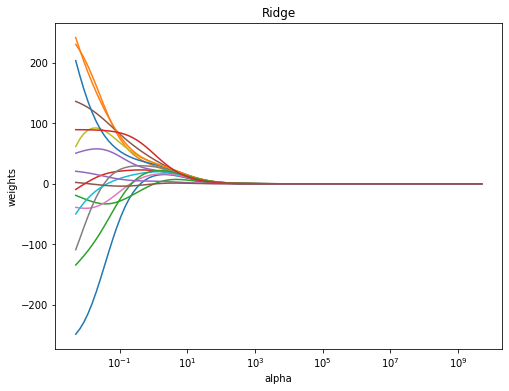

In [52]:
plt.figure(figsize=(8,6))
fig = plt.gca()
fig.plot(alphas, coefs)
fig.set_xscale('log')

plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge')

In [53]:
#10-fold cross-validation to choose the best alpha, then refit model
ridge_cv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridge_cv.fit(X_train, y_train)
ridge_model3 = Lasso(alpha=ridge_cv.alpha_,max_iter = 100000, normalize = True).fit(X_train, y_train)

In [54]:
#optimal value of the regularization penality
print("The optimal value of the regularization penality for Ridge cross validation is\n", ridge_cv.alpha_)

The optimal value of the regularization penality for Ridge cross validation is
 0.5748784976988678


In [57]:
ridge_mse = mean_squared_error(y_test, ridge_model3.predict(X_test))
print("Ridge MSE with best Alpha is\n", ridge_mse)

Ridge MSE with best Alpha is
 161879.54631840435


In [56]:
pd.Series(ridge_model3.coef_, index=X.columns)

AtBat     -0.054533
Hits       1.615264
HmRun     -0.000000
Runs       0.000000
RBI        0.000000
Walks      3.720994
Years     -0.000000
CAtBat     0.000000
CHits      0.140394
CHmRun    -0.000000
CRuns      0.000000
CRBI       0.294084
CWalks    -0.000000
PutOuts    0.312213
Assists    0.000000
Errors    -0.000000
dtype: float64

## 2. 

### Explain in your own words the bias-variance tradeoff. 

### What role does regularization play in this tradeoff? 

### Make reference to your findings in number (1) to describe models of high/low bias and variance.

Bias is the differences between the actual value and prediction of model. Variance is the variability and complexity of the model. The bias-variance tradeoff means that when a model is complex and has a large number of features/variables then it will have higher variance and lower bias. If a model is simple and have very few variables, it will have higher bias and lower variance. Since it is almost impossible to have both low bias and low variance, we need to choose one of them and give up the other one. Thus we say it is a bias-variance tradeoff.



Lasso uses L1 regularization and ridge uses L2. They all use a penalty on coefficients. In part 1.1, after fitting with Lasso regression, the number of features is shrunk to 3 which can reduce the variance of the model but increase the bias. Thus, the regularization can help reduce the variance and prevent overfitting. For example, in Lasso it can help feature selection by shrinking the contribution of each feature. Then instead of keeping all the variables, now we only keep some features so that the variance of the model will decrease but the bias will increase.

For part 1.1, we see that alpha is equal to 10, and it results in a model with only 3 variables. This will have relatively low variance but high bias. But when we use cross validation and set alpha to 1.39, the model now is more complex and has 5 variables left. This will result in higher variance and lower bias.